## L-LAYER NEURAL NETWORK CODING AND APPLICATION

### Description

Build an L-layer neural network with the following structure: [LINEAR -> RELU] x (L-1) -> LINEAR -> SIGMOID.

Follow the Deep Learning concept to build the model:

1. Initialize parameters / Define hyperparameters


2. Loop over num_iterations:

    a. Forward propagation

    b. Compute cost function

    c. Backward propagation

    d. Update parameters (using parameters, and grads from backprop)


3. Use trained parameters to classify and predict cat or non-cat labels

#### 1. Import libraries

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (5.0, 5.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(1)

#### 2. Initialize L-layer parameters

In [175]:
# def initialize_2_layer_parameters(n_x, n_h, n_y):
#     """
#     Argument:
#     n_x -- size of the input layer
#     n_h -- size of the hidden layer
#     n_y -- size of the output layer
    
#     Returns:
#     parameters -- python dictionary containing your parameters:
#     W1 -- weight matrix of shape (n_h, n_x)
#     b1 -- bias vector of shape (n_h, 1)
#     W2 -- weight matrix of shape (n_y, n_h)
#     b2 -- bias vector of shape (n_y, 1)
    
#     """
#     np.random.seed(1)
    
#     W1 = np.random.randn(n_h, n_x)*0.01
#     b1 = np.zeros((n_h, 1))
#     W2 = np.random.randn(n_y, n_h)*0.01
#     b2 = np.zeros((n_y, 1))
    
#     assert(W1.shape == (n_h, n_x))
#     assert(b1.shape == (n_h, 1))
#     assert(W2.shape == (n_y, n_h))
#     assert(b2.shape == (n_y, 1))

#     parameters = {"W1": W1,
#                   "b1": b1,
#                   "W2": W2,
#                   "b2": b2}
    
#     return parameters


In [2]:
def initialize_parameters_deep(layer_dims):
	"""
	Arguments:
	layer_dims -- python array (list) containing the dimensions of each layer in network

	Returns:
	parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
	Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
	bl -- bias vector of shape (layer_dims[l], 1)
	"""
    
	np.random.seed(3)
	parameters = {}
	L = len(layer_dims) # number of layers in the network

	for l in range(1, L): # (1 -> L-1)

		parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
		parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))


		assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
		assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))


	return parameters

In [3]:
# Test initialized parameters
parameters = initialize_parameters_deep([10,5,4,3])

In [4]:
print(parameters["W1"].shape)
print(parameters["b1"].shape)
print(parameters["W2"].shape)
print(parameters["b2"].shape)
print(parameters["W3"].shape)
print(parameters["b3"].shape)

(5, 10)
(5, 1)
(4, 5)
(4, 1)
(3, 4)
(3, 1)


#### 3. Define some helpful functions for L-layer model

In [5]:
def linear_forward(A, W, b):
    "Implement the linear part of a layer's forward propagation."
    Z = np.dot(W, A) + b # Z = A*W + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [6]:
A = np.random.randn(3,2)
W = np.random.randn(1,3)
b = np.random.randn(1,1)

In [7]:
Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))
print(Z.shape)
# print(linear_cache)

Z = [[-2.43363578  1.31698628]]
(1, 2)


In [21]:
def linear_activation_forward(A_prev, W, b, activation):
    "Forward propagation for the LINEAR->ACTIVATION layer."
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [9]:
A_prev = np.random.randn(3,2)
W = np.random.randn(1,3)
b = np.random.randn(1,1)
# print("A_prev = ", A_prev.shape)
# print("W = ", W.shape)
# print("b = ", b.shape)

In [10]:
# Activation functions
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):  
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

In [11]:
A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A)) # A.shape = (1,2)

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("Activation cache = \n", linear_activation_cache)
print("With ReLU: A = " + str(A)) # A.shape = (1,2)

With sigmoid: A = [[0.16084639 0.08386785]]
Activation cache = 
 ((array([[-0.95999618,  0.37729523],
       [-0.57470842, -0.10945433],
       [ 0.6790716 , -0.85543717]]), array([[-0.30020607,  2.15814934,  0.87428572]]), array([[-1.29353663]])), array([[-1.65194394, -2.39091825]]))
With ReLU: A = [[0. 0.]]


In [12]:
def L_model_forward(X, parameters):
    "Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation"
    caches = []
    A = X   # data, np array of shape (input size, number of examples)
    L = len(parameters) // 2   # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W'+str(l)], parameters['b'+str(l)], activation="relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W'+str(L)], parameters['b'+str(L)], activation="sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [13]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    m = Y.shape[1]

    # Compute loss from aL and y.
    err = np.dot(Y, np.log(AL).T) + np.dot((1-Y), np.log(1-AL).T)
    cost = -1/m*np.sum(err)
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [14]:
def compute_cost_test_case():
    Y = np.asarray([[1, 1, 0]])
    aL = np.array([[.8,.9,0.4]])
    
    return Y, aL

In [15]:
Y, AL = compute_cost_test_case()
print("cost = " + str(compute_cost(AL, Y)))

cost = 0.2797765635793422


In [16]:
def linear_backward(dZ, cache):
    "Implement the linear portion of backward propagation for a single layer (layer l)"
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = 1/m*np.dot(dZ, A_prev.T)
    db = 1/m*np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [17]:
# Compute activation function gradient
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.
    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.
    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [18]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db
    

In [19]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation

    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) # derivative of cost with respect to AL
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". 
    # Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    # grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = None
    
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache, "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [20]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)]-learning_rate*grads["dW" + str(l + 1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)]-learning_rate*grads["db" + str(l + 1)]
        
    return parameters

#### 4. Load dataset

In [23]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [24]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_dataset()

In [25]:
print(train_x_orig.shape)
print(train_y.shape)
print(test_x_orig.shape)
print(test_y.shape)

(209, 64, 64, 3)
(1, 209)
(50, 64, 64, 3)
(1, 50)


In [26]:
m_train = train_x_orig.shape[0]
m_test = test_x_orig.shape[0]
num_px = train_x_orig.shape[1]

In [27]:
# Reshape & standardize the training and test samples
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T  # The "-1" makes reshape flatten the remaining dimensions
print(train_x_flatten.shape)
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T
print(test_x_flatten.shape)

(12288, 209)
(12288, 50)


In [28]:
# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.
print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


#### 5. Build L-layer model based on some helpful functions above

In [29]:
def L_layer_model(X,Y,layers_dims,learning_rate = 0.0075,num_iterations=3000,print_cost=False): #lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 iters
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.figure(figsize=(10,5))
    plt.plot(np.squeeze(costs))
    plt.grid()
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [30]:
# CONSTANTS
layers_dims = [12288, 10, 7, 4, 1] # 4-hidden layer model

Cost after iteration 0: 0.693146
Cost after iteration 100: 0.678005
Cost after iteration 200: 0.667593
Cost after iteration 300: 0.660414
Cost after iteration 400: 0.655451
Cost after iteration 500: 0.652007
Cost after iteration 600: 0.649610
Cost after iteration 700: 0.647937
Cost after iteration 800: 0.646766
Cost after iteration 900: 0.645944
Cost after iteration 1000: 0.645366
Cost after iteration 1100: 0.644959
Cost after iteration 1200: 0.644671
Cost after iteration 1300: 0.644468
Cost after iteration 1400: 0.644324


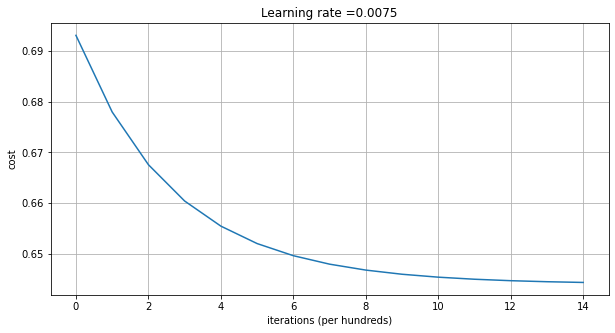

In [31]:
# Train L_layer_model
parameters_L_layer_model = L_layer_model(train_x, train_y, 
                                         layers_dims, 
                                         learning_rate = 0.0075, 
                                         num_iterations = 1500, 
                                         print_cost = True)

In [33]:
# Save model:
from pickle import dump

filename = './saved_models/4-layer_model.sav'
dump(parameters, open(filename, 'wb'))

In [ ]:
# Load saved model:
from pickle import load

parameters = load(open('2-layer-model.sav', 'rb'))

In [32]:
# EVALUATE PREDICTIONS on train & test set:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

In [53]:
pred_train = predict(train_x, train_y, parameters_L_layer_model)
pred_test = predict(test_x, test_y, parameters_L_layer_model)

Accuracy: 0.9952153110047844
Accuracy: 0.74


In [99]:
def print_mislabeled_images(classes, X, y, p):
    """
    Plots images where predictions and truth were different.
    X -- dataset
    y -- true labels
    p -- predictions
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (60.0, 60.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))

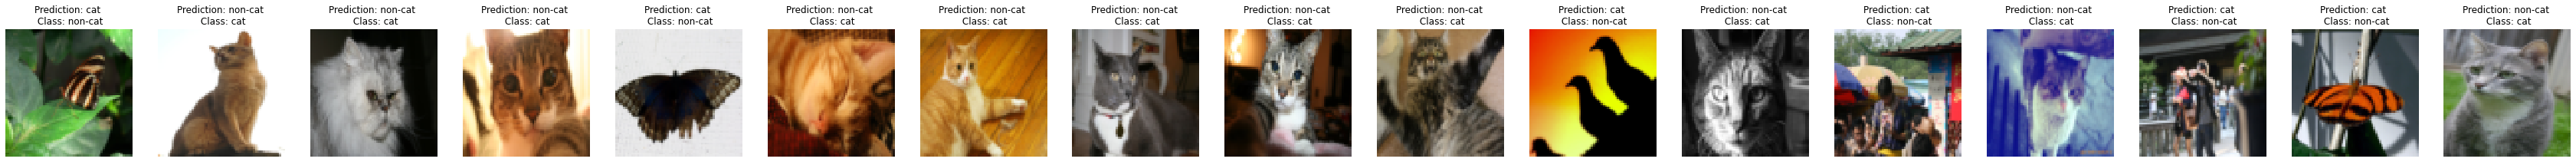

In [127]:
print_mislabeled_images(classes, test_x, test_y, pred_test)

(262, 400, 3)


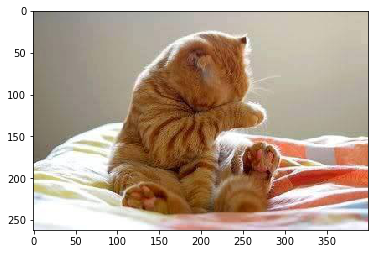

In [58]:
# Load and show my new image
from PIL import Image

image = np.array(Image.open("./images/test.jpg"))

# Obtain the size of the image
print(image.shape)

plt.figure(figsize=(6,6))
plt.imshow(image)

In [59]:
# Standardize image for prediction
import cv2
image = image/255.
dim = (num_px, num_px)
my_image = cv2.resize(image,dim)
my_image = my_image.reshape((num_px*num_px*3,1))

In [60]:
my_label_y = [1]
pred_new = predict(my_image, my_label_y, parameters_L_layer_model)

Accuracy: 1.0


In [61]:
print ("y = " + str(np.squeeze(pred_new)) + ", your L-layer nn model predicts this is a \"" + 
    classes[int(np.squeeze(pred_new)),].decode("utf-8") +  "\" picture.")

y = 1.0, your L-layer nn model predicts this is a "cat" picture.


In [34]:
from PIL import Image
import cv2

def predict_new_image(image_path,dim):
    image = np.array(Image.open(image_path))
    plt.figure(figsize=(6,6))
    plt.imshow(image)
    image = image/255.
#     dim = (num_px, num_px)
    my_image = cv2.resize(image,dim)
    my_image = my_image.reshape((dim[0]*dim[1]*3,1))
    my_label_y = [0]
    pred_new = predict(my_image, my_label_y, parameters_L_layer_model)
    print ("y = " + str(np.squeeze(pred_new)) + ", your L-layer nn model predicts this is a \"" + 
    classes[int(np.squeeze(pred_new)),].decode("utf-8") +  "\" picture.")
    
    return pred_new

Accuracy: 1.0
y = 0.0, your L-layer nn model predicts this is a "non-cat" picture.


array([[0.]])

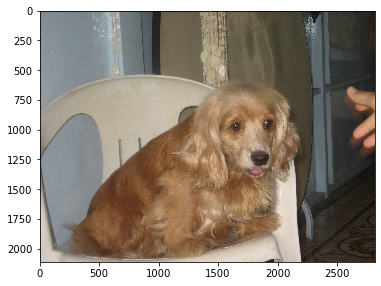

In [35]:
# path = "./images/Tiger.jpg"
path = "D:/PICTURES/ANIMALS/037.jpg"
dim = (64,64)

predict_new_image(path,dim)